In [52]:
import re
import json
import seaborn as sns
import pandas as pd

def extract_trust_rate(text):
    """
    Extracts the percentage after 'Trust rate:' and converts it to a number.

    Args:
        text (str): The input text containing 'Trust rate:'.

    Returns:
        int: The extracted trust rate as a number.
    """
    # Use a regular expression to find 'Trust rate: [number]%'
    match = re.search(r"Trust rate:\s*(\d+)%", text)
    if match:
        # Convert the captured number to an integer
        return float(match.group(1))
    # else:
    #     raise ValueError("Trust rate not found in the text.")

# Example usage
text = """I appreciate your thorough analysis of the scenario regarding giraffes and their height in relation to survival advantages. Your conclusion that the correct answer is A) directional selection is well-founded. The reasoning aligns with the principles of evolutionary biology, where a specific trait (in this case, height) is favored due to environmental pressures, leading to a shift in the population's characteristics over time.

However, I would like to delve deeper into the implications of this selection process. While directional selection is indeed the primary mechanism at play, we should also consider the potential long-term effects on genetic diversity within the giraffe population. If only taller giraffes are favored, there may be a reduction in genetic variation, which could make the population more vulnerable to future environmental changes or diseases. 

Additionally, it might be worth exploring whether there are any other environmental factors that could influence this selection process. For example, if food sources were to change again, would shorter giraffes have a chance to thrive? This could lead to a more complex interplay of selection types over time.

In response to your invitation for differing interpretations, I would argue that while directional selection is the most applicable term here, we should remain aware of the broader ecological context and the potential for other selection pressures to emerge in the future.

Trust rate: 90%  
Reason for trust: The reasoning presented is logical and consistent with established evolutionary principles. The agent demonstrates a solid understanding of the concepts involved. However, there is a slight uncertainty regarding the consideration of future environmental changes and their impact on the giraffe population, which could introduce additional complexities not fully addressed in the initial analysis."""

# Extract trust rate
trust_rate = extract_trust_rate(text)
print(trust_rate)


90.0


In [4]:
with open('camel-exp/debate_linear/solve_logs/mmlubio_original.json', 'r') as file:
    data_linear_original = json.load(file)

In [5]:
trust_linear_ori_2=[]
trust_linear_ori_3=[]
for i in range(len(data_linear_original)):
    trust_linear_ori_2.append(extract_trust_rate(data_linear_original[i][1]['Solver_2']))
    trust_linear_ori_3.append(extract_trust_rate(data_linear_original[i][2]['Solver_3']))

In [6]:
with open('camel-exp/debate_linear/solve_logs/mmlubio_persuasive-1.json', 'r') as file:
    data_linear_per1 = json.load(file)

In [7]:
trust_linear_per1_2=[]
trust_linear_per1_3=[]
for i in range(len(data_linear_per1)):
    trust_linear_per1_2.append(extract_trust_rate(data_linear_per1[i][1]['Solver_2']))
    trust_linear_per1_3.append(extract_trust_rate(data_linear_per1[i][2]['Solver_3']))

In [8]:
with open('camel-exp/debate_linear/solve_logs/mmlubio_persuasive-2.json', 'r') as file:
    data_linear_per2 = json.load(file)

In [9]:
trust_linear_per2_2=[]
trust_linear_per2_3=[]
for i in range(len(data_linear_per2)):
    trust_linear_per2_2.append(extract_trust_rate(data_linear_per2[i][1]['Solver_2']))
    trust_linear_per2_3.append(extract_trust_rate(data_linear_per2[i][2]['Solver_3']))

In [10]:
with open('camel-exp/debate_linear/solve_logs/mmlubio_persuasive-3.json', 'r') as file:
    data_linear_per3 = json.load(file)

In [11]:
trust_linear_per3_2=[]
trust_linear_per3_3=[]
for i in range(len(data_linear_per3)):
    trust_linear_per3_2.append(extract_trust_rate(data_linear_per3[i][1]['Solver_2']))
    trust_linear_per3_3.append(extract_trust_rate(data_linear_per3[i][2]['Solver_3']))

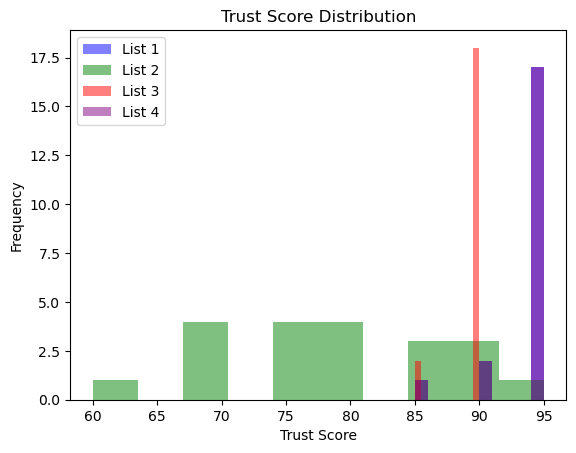

In [12]:
import matplotlib.pyplot as plt
plt.hist(trust_linear_ori_2, bins=10, alpha=0.5, label='List 1', color='blue')
plt.hist(trust_linear_per1_2, bins=10, alpha=0.5, label='List 2', color='green')
plt.hist(trust_linear_per2_2, bins=10, alpha=0.5, label='List 3', color='red')
plt.hist(trust_linear_per3_2, bins=10, alpha=0.5, label='List 4', color='purple')
plt.legend()
plt.title('Trust Score Distribution')
plt.xlabel('Trust Score')
plt.ylabel('Frequency')
plt.show()

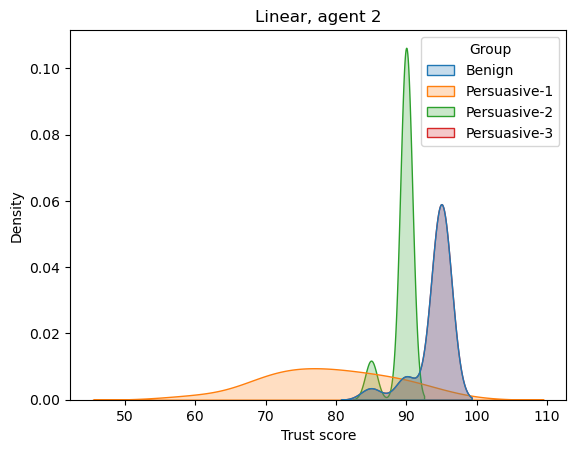

In [23]:
# Combine data into a single list with labels
data = trust_linear_ori_2 + trust_linear_per1_2 + trust_linear_per2_2 + trust_linear_per3_2
labels = ['Benign'] * len(trust_linear_ori_2) + ['Persuasive-1'] * len(trust_linear_per1_2) + ['Persuasive-2'] * len(trust_linear_per2_2) + ['Persuasive-3'] * len(trust_linear_per3_2)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Linear, agent 2')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()


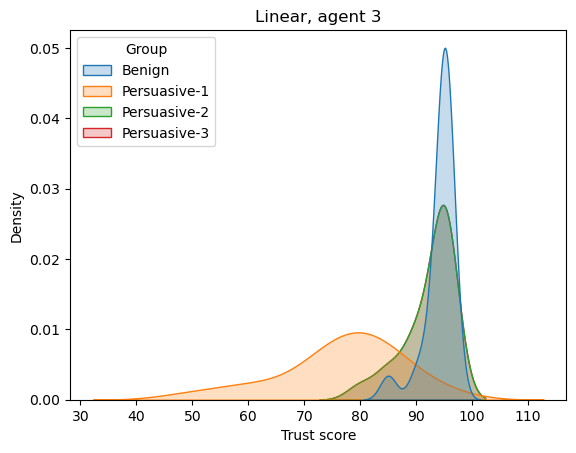

In [24]:
# Combine data into a single list with labels
data = trust_linear_ori_3 + trust_linear_per1_3 + trust_linear_per2_3 + trust_linear_per3_3
labels = ['Benign'] * len(trust_linear_ori_3) + ['Persuasive-1'] * len(trust_linear_per1_3) + ['Persuasive-2'] * len(trust_linear_per2_3) + ['Persuasive-3'] * len(trust_linear_per3_3)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Linear, agent 3')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()

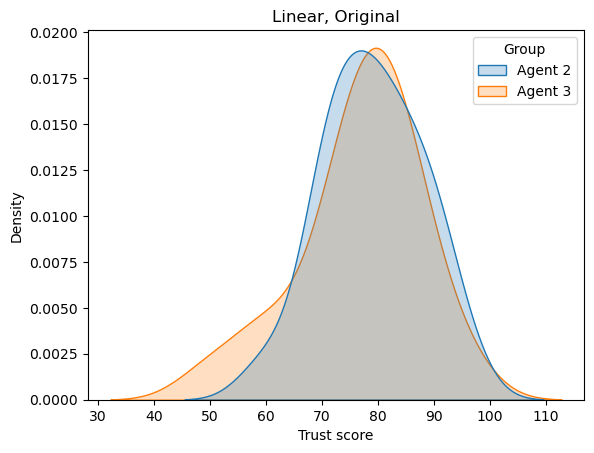

In [26]:
# Combine data into a single list with labels
data = trust_linear_per1_2 + trust_linear_per1_3
labels = ['Agent 2'] * len(trust_linear_per1_2) + ['Agent 3'] * len(trust_linear_per1_3)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Linear, Original')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()

In [41]:
with open('camel-exp/debate_circle/solve_logs/mmlubio_original.json', 'r') as file:
    data_circle_original = json.load(file)
trust_circle_ori_2=[]
for i in range(len(data_circle_original)):
    trust_circle_ori_2 = trust_circle_ori_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_original[i] if 'Solver_2' in d]

with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-1.json', 'r') as file:
    data_circle_per1 = json.load(file)
trust_circle_per1_2=[]
for i in range(len(data_circle_per1)):
    trust_circle_per1_2 = trust_circle_per1_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per1[i] if 'Solver_2' in d]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-2.json', 'r') as file:
    data_circle_per2 = json.load(file)
trust_circle_per2_2=[]
for i in range(len(data_circle_per2)):
    trust_circle_per2_2 = trust_circle_per2_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per2[i] if 'Solver_2' in d]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-3.json', 'r') as file:
    data_circle_per3 = json.load(file)
trust_circle_per3_2=[]
for i in range(len(data_circle_per3)):
    trust_circle_per3_2 = trust_circle_per3_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per3[i] if 'Solver_2' in d]


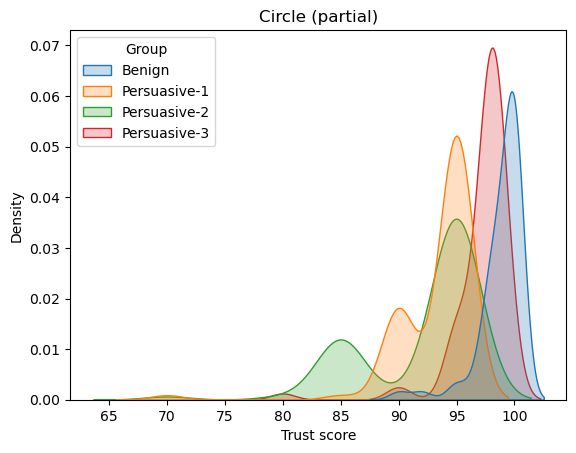

In [43]:
data = trust_circle_ori_2 + trust_circle_per1_2 + trust_circle_per2_2 + trust_circle_per3_2
labels = ['Benign'] * len(trust_circle_ori_2) + ['Persuasive-1'] * len(trust_circle_per1_2) + ['Persuasive-2'] * len(trust_circle_per2_2) + ['Persuasive-3'] * len(trust_circle_per3_2)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Circle (partial)')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()


In [47]:
with open('camel-exp/debate_circle/solve_logs/mmlubio_original_all.json', 'r') as file:
    data_circle_original = json.load(file)
trust_circle_ori_2=[]
for i in range(len(data_circle_original)):
    trust_circle_ori_2 = trust_circle_ori_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_original[i] if 'Solver_2' in d]

with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-1_all.json', 'r') as file:
    data_circle_per1 = json.load(file)
trust_circle_per1_2=[]
for i in range(len(data_circle_per1)):
    trust_circle_per1_2 = trust_circle_per1_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per1[i] if 'Solver_2' in d]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-2_all.json', 'r') as file:
    data_circle_per2 = json.load(file)
trust_circle_per2_2=[]
for i in range(len(data_circle_per2)):
    trust_circle_per2_2 = trust_circle_per2_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per2[i] if 'Solver_2' in d]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-3_all.json', 'r') as file:
    data_circle_per3 = json.load(file)
trust_circle_per3_2=[]
for i in range(len(data_circle_per3)):
    trust_circle_per3_2 = trust_circle_per3_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per3[i] if 'Solver_2' in d]

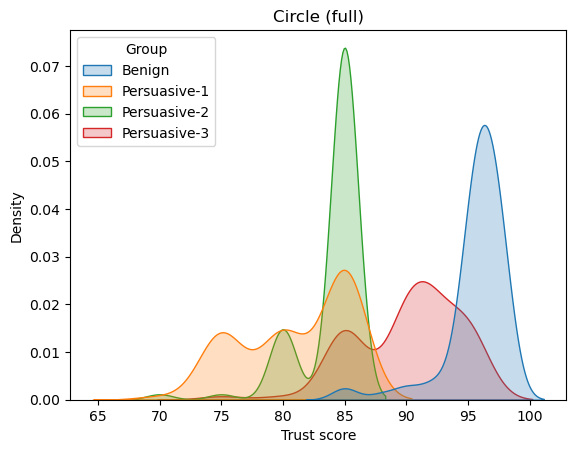

In [48]:
data = trust_circle_ori_2 + trust_circle_per1_2 + trust_circle_per2_2 + trust_circle_per3_2
labels = ['Benign'] * len(trust_circle_ori_2) + ['Persuasive-1'] * len(trust_circle_per1_2) + ['Persuasive-2'] * len(trust_circle_per2_2) + ['Persuasive-3'] * len(trust_circle_per3_2)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Circle (full)')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()

In [57]:
with open('camel-exp/debate_circle/solve_logs/mmlubio_original_all3.json', 'r') as file:
    data_circle_original = json.load(file)
trust_circle_ori_2=[]
trust_circle_ori_3=[]
for i in range(len(data_circle_original)):
    trust_circle_ori_2 = trust_circle_ori_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_original[i] if 'Solver_2' in d]
    trust_circle_ori_3 = trust_circle_ori_3+[extract_trust_rate(d['Solver_3']) for d in data_circle_original[i] if 'Solver_3' in d]
trust_circle_ori_2=[item for item in trust_circle_ori_2 if item is not None]
trust_circle_ori_3=[item for item in trust_circle_ori_3 if item is not None]

with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-1_all3.json', 'r') as file:
    data_circle_per1 = json.load(file)
trust_circle_per1_2=[]
trust_circle_per1_3=[]
for i in range(len(data_circle_per1)):
    trust_circle_per1_2 = trust_circle_per1_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per1[i] if 'Solver_2' in d]
    trust_circle_per1_3 = trust_circle_per1_3+[extract_trust_rate(d['Solver_3']) for d in data_circle_per1[i] if 'Solver_3' in d]
trust_circle_per1_2=[item for item in trust_circle_per1_2 if item is not None]
trust_circle_per1_3=[item for item in trust_circle_per1_3 if item is not None]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-2_all3.json', 'r') as file:
    data_circle_per2 = json.load(file)
trust_circle_per2_2=[]
trust_circle_per2_3=[]
for i in range(len(data_circle_per2)):
    trust_circle_per2_2 = trust_circle_per2_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per2[i] if 'Solver_2' in d]
    trust_circle_per2_3 = trust_circle_per2_3+[extract_trust_rate(d['Solver_3']) for d in data_circle_per2[i] if 'Solver_3' in d]
trust_circle_per2_2=[item for item in trust_circle_per2_2 if item is not None]
trust_circle_per2_3=[item for item in trust_circle_per2_3 if item is not None]
    
with open('camel-exp/debate_circle/solve_logs/mmlubio_persuasive-3_all3.json', 'r') as file:
    data_circle_per3 = json.load(file)
trust_circle_per3_2=[]
trust_circle_per3_3=[]
for i in range(len(data_circle_per3)):
    trust_circle_per3_2 = trust_circle_per3_2+[extract_trust_rate(d['Solver_2']) for d in data_circle_per3[i] if 'Solver_2' in d]
    trust_circle_per3_3 = trust_circle_per3_3+[extract_trust_rate(d['Solver_3']) for d in data_circle_per3[i] if 'Solver_3' in d]
trust_circle_per3_2=[item for item in trust_circle_per3_2 if item is not None]
trust_circle_per3_3=[item for item in trust_circle_per3_3 if item is not None]

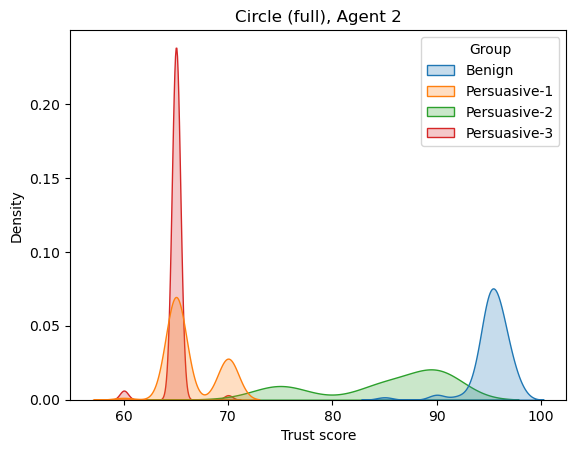

In [58]:
data = trust_circle_ori_2 + trust_circle_per1_2 + trust_circle_per2_2 + trust_circle_per3_2
labels = ['Benign'] * len(trust_circle_ori_2) + ['Persuasive-1'] * len(trust_circle_per1_2) + ['Persuasive-2'] * len(trust_circle_per2_2) + ['Persuasive-3'] * len(trust_circle_per3_2)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Circle (full), Agent 2')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()

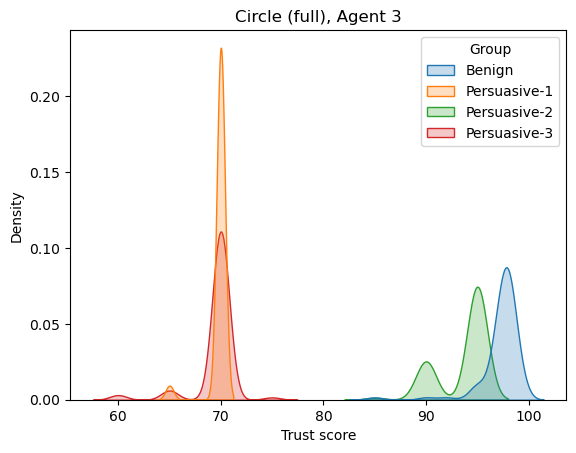

In [59]:
data = trust_circle_ori_3 + trust_circle_per1_3 + trust_circle_per2_3 + trust_circle_per3_3
labels = ['Benign'] * len(trust_circle_ori_3) + ['Persuasive-1'] * len(trust_circle_per1_3) + ['Persuasive-2'] * len(trust_circle_per2_3) + ['Persuasive-3'] * len(trust_circle_per3_3)

# Create a DataFrame for plotting
df = pd.DataFrame({'Value': data, 'Group': labels})

# Plot KDE for each group
sns.kdeplot(data=df, x="Value", hue="Group", fill=True)
plt.title('Circle (full), Agent 3')
plt.xlabel('Trust score')
plt.ylabel('Density')
plt.show()